# Decision Trees and Gradient Boosting

## Setting up the Environment

For this laboratory exercise, you will need to install the Anaconda package & environment manager. We will install a minimal distribution, [Miniconda](https://docs.conda.io/projects/miniconda/en/latest/). Choose the adequate distribution for your operating system, download and install it.

Or use the following commands:

### Windows
```shell
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe -o miniconda.exe
start /wait "" miniconda.exe /S
del miniconda.exe
```

### Linux
```shell
mkdir -p ~/miniconda3
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -O ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
rm -rf ~/miniconda3/miniconda.sh
```

### macOS

```shell
mkdir -p ~/miniconda3
curl https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-arm64.sh -o ~/miniconda3/miniconda.sh
bash ~/miniconda3/miniconda.sh -b -u -p ~/miniconda3
rm -rf ~/miniconda3/miniconda.sh
```

For both Linux and macOS after installing, initialize your newly-installed Miniconda. The following commands initialize for bash and zsh shells:

```shell
~/miniconda3/bin/conda init bash
~/miniconda3/bin/conda init zsh
```


Once you have installed miniconda, run the following commands to create an environment:
```bash
conda create --name myenv
```

'myenv' is the name of the environment, you can change the name however you want.

When conda asks you to proceed, type y

After successfully creating the environment, activate it with the following command:
```bash
conda activate myenv
```

For more detailed information you can read the [documentation](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#creating-an-environment-with-commands).

Now, once the environment is activated, proceed to install the required libraries.

```bash
pip install numpy pandas scikit-learn xgboost matplotlib seaborn gdown
```

In the next step, we need to add the environment to jupyter. Use the following commands to install ipykernel and add the environment to ipykernel.

```bash
pip install ipykernel
```
```bash
python -m ipykernel install --name=myenv
```


Next, start Jupyter Notebook, download this starter notebook and open it. On the dropdown menu in the Kernel tab choose the name of the environment you created, like in the picture below.


![jupyter](https://drive.google.com/uc?export=view&id=1N-27jjlIgpTILi-_6lny7ng8sE52SAZx)


## Download and Read the Dataset

run the code below for downloading the dataset

In [ ]:
!gdown 1boIax8d9Sat6OJzkiIjjpqmtSZKuRYrx

Downloading...
From: https://drive.google.com/uc?id=1boIax8d9Sat6OJzkiIjjpqmtSZKuRYrx
To: /content/ElectricCarData.csv
100% 8.20k/8.20k [00:00<00:00, 26.2MB/s]


### Import the required libraries

In [ ]:
import pandas as pd

### Read the dataset

CONTEXT:
This is a dataset of electric vehicles.

It contains the following columns:


*   Brand
*   Model
*   AccelSec - Acceleration as 0-100 km/h
*   TopSpeed_KmH - The top speed in km/h
*   Range_Km - Range in km
*   Efficiency_WhKm - Efficiency Wh/km
*   FastCharge_KmH - Charge km/h
*   RapidCharge - Yes / No
*   PowerTrain - Front, rear, or all wheel drive
*   PlugType
*   BodyStyle - Basic size or style
*   Segment - Market segment
*   Seats - Number of seats
*   PriceEuro - Price in Germany before tax incentives




TASK:
Predict the target 'PriceEuro' and compare the performance of the DecisionTreeRegressor and the XGBRegressor models.

In [ ]:
data = pd.read_csv('/content/ElectricCarData.csv')

In [ ]:
data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,Yes,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


<Axes: >

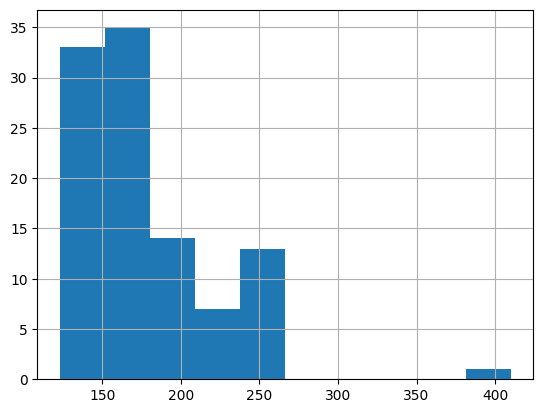

In [ ]:
data.TopSpeed_KmH.hist()

In [ ]:
data.isna().sum()

Brand              0
Model              0
AccelSec           0
TopSpeed_KmH       0
Range_Km           0
Efficiency_WhKm    0
FastCharge_KmH     0
RapidCharge        0
PowerTrain         0
PlugType           0
BodyStyle          0
Segment            0
Seats              0
PriceEuro          0
dtype: int64

### Encode string variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['Brand'] = encoder.fit_transform(data['Brand'])
data['Model'] = encoder.fit_transform(data['Model'])
data['RapidCharge'] = encoder.fit_transform(data['RapidCharge'])
data['PowerTrain'] = encoder.fit_transform(data['PowerTrain'])
data['PlugType'] = encoder.fit_transform(data['PlugType'])
data['BodyStyle'] = encoder.fit_transform(data['BodyStyle'])
data['Segment'] = encoder.fit_transform(data['Segment'])

In [ ]:
data = data[data['FastCharge_KmH'] != "-"]

data.reset_index(drop=True, inplace=True)

In [ ]:
data

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,30,46,4.6,233,450,161,940,1,0,2,7,3,5,55480
1,31,33,10.0,160,270,167,250,1,2,2,1,2,5,30000
2,23,0,4.7,210,400,181,620,1,0,2,2,3,5,56440
3,2,101,6.8,180,360,206,560,1,2,2,6,3,5,68040
4,9,78,9.5,145,170,168,190,1,2,2,1,1,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,20,6,7.5,160,330,191,440,1,1,2,1,2,5,45000
94,1,94,4.5,210,335,258,540,1,0,2,6,4,5,96050
95,20,8,5.9,200,325,194,440,1,0,2,1,2,5,50000
96,20,10,5.1,200,375,232,450,1,0,2,1,2,5,65000


## Split the dataset for training and testing in ratio 80:20

In [ ]:
Y=data['PriceEuro']
X= data[['AccelSec','Range_Km', 'Brand','BodyStyle','Segment','Efficiency_WhKm']]

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

## Initialize the DecisionTreeRegressor model, and use the fit function for training the model.

Add values for the parameters max_depth, min_samples_split, and max_features.

Fit the model using the fit function


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='absolute_error',max_depth=4,min_samples_split=5,min_samples_leaf=5)

In [ ]:
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=4,
                      min_samples_leaf=5, min_samples_split=5)

## Predict the outcomes for X test

In [ ]:
y_pred1 = regressor.predict(X_test)

In [ ]:
print("Accuracy:",regressor.score(X_test, Y_test))

Accuracy: 0.8177877455621683


## Assess the model performance, by using sklearn metrics for regression

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
r2_score(Y_test,y_pred1)

0.8177877455621683

In [ ]:
mean_absolute_error(Y_test,y_pred1)

8800.65

## Initialize the XGBRegressor model, and use the fit function

Add values for the parameters: n_estimators, max_depth, learning_rate, and set the objective to "reg:squarederror"

Fit the model using the fit function

In [ ]:
Y=data['PriceEuro']
X= data[['AccelSec','Range_Km', 'Brand','BodyStyle','Segment','Efficiency_WhKm']]

X_train, X_test, Y_train, Y_test = train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(objective ='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=2,n_estimators=10)
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:34:54] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

## Predict the outcomes for X test

In [ ]:
y_pred2 = model.predict(X_test)

In [ ]:
print("y_pred:",y_pred2)

y_pred: [42678.055 49932.92  45484.28  78518.945 59296.79  50513.613 43444.062
 42678.055 43922.465 45484.28  81447.36  44424.777 54748.38  47257.195
 50665.95  57076.348 60760.277 45484.28  57291.1   65187.18 ]


## Assess the model performance, by using sklearn metrics for regression

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

print("Mean Absolute Error : " + str(mean_absolute_error(y_pred2, Y_test)))
print("Mean Squared Error : " + str(mean_squared_error(y_pred2, Y_test)))
print("Root Mean Squared Error : " + str(np.sqrt(mean_squared_error(y_pred2, Y_test))))

Mean Absolute Error : 19387.5072265625
Mean Squared Error : 911128384.7998192
Root Mean Squared Error : 30184.903259739283


## Compare the performances of both model for at least three regression metircs

In [ ]:
mae1 = mean_absolute_error(Y_test, y_pred1)
mae2 = mean_absolute_error(Y_test, y_pred2)

mse1 = mean_squared_error(Y_test, y_pred1)
mse2 = mean_squared_error(Y_test, y_pred2)

r2_1 = r2_score(Y_test, y_pred1)
r2_2 = r2_score(Y_test, y_pred2)

# Print the results
print("Model 1 Metrics:")
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"R-squared: {r2_1}")

print("\nModel 2 Metrics:")
print(f"MAE: {mae2}")
print(f"MSE: {mse2}")
print(f"R-squared: {r2_2}")

Model 1 Metrics:
MAE: 36732.85
MSE: 2930819953.95
R-squared: -0.8193072527677867

Model 2 Metrics:
MAE: 19387.5072265625
MSE: 911128384.7998192
R-squared: 0.4344168168928779
